In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

# Load the CSV file into a DataFrame
df_cars = pd.read_csv('../data/cars.csv')

['USA' 'Japan' 'Germany']


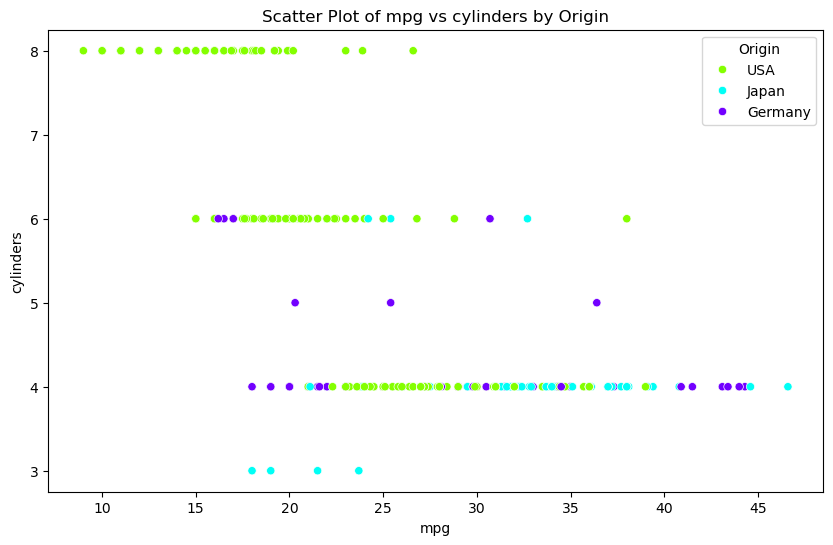

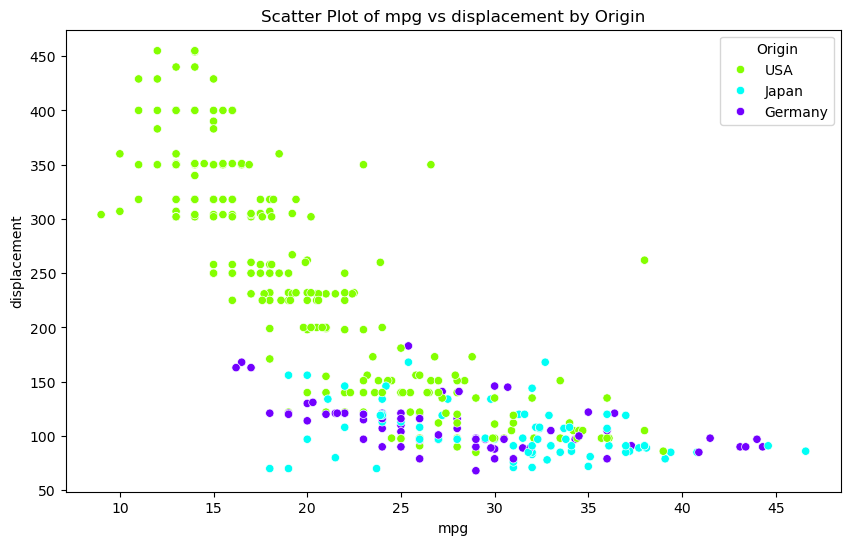

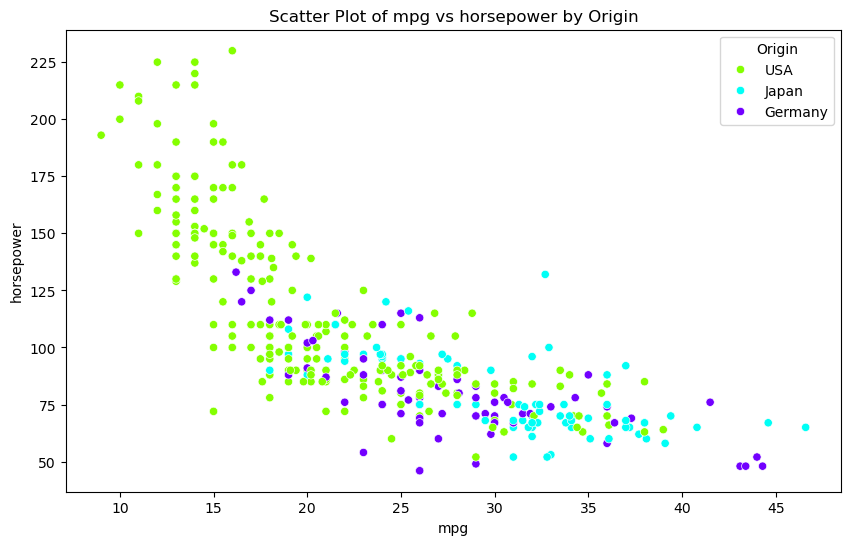

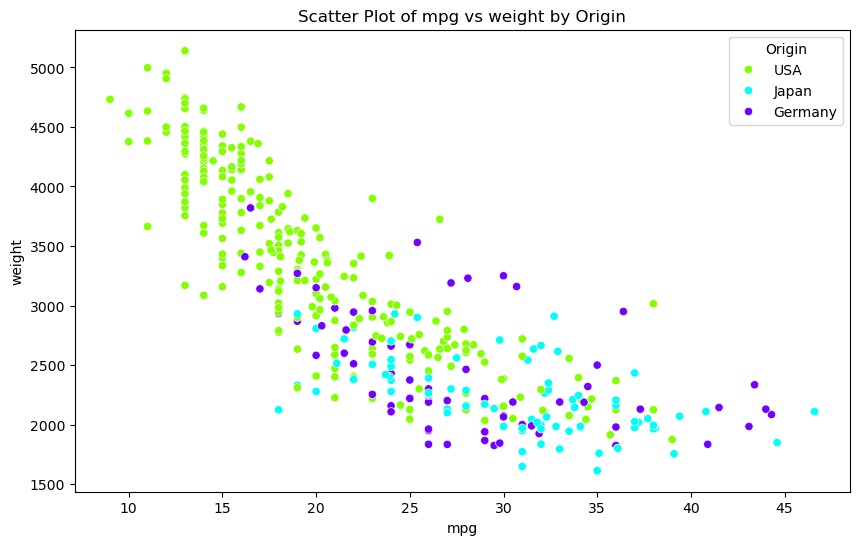

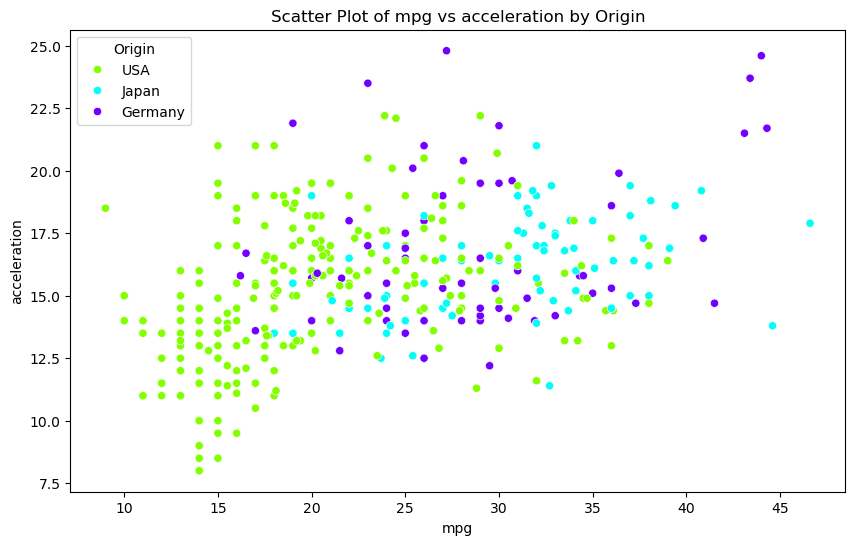

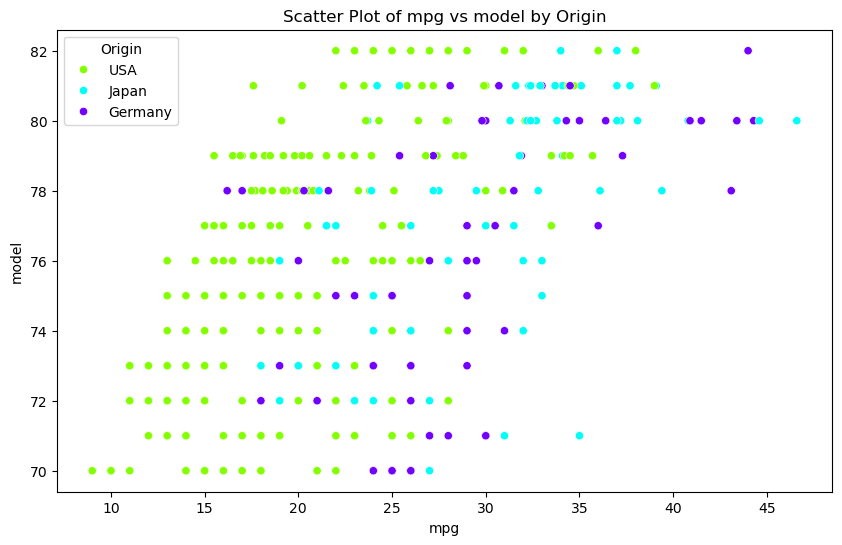

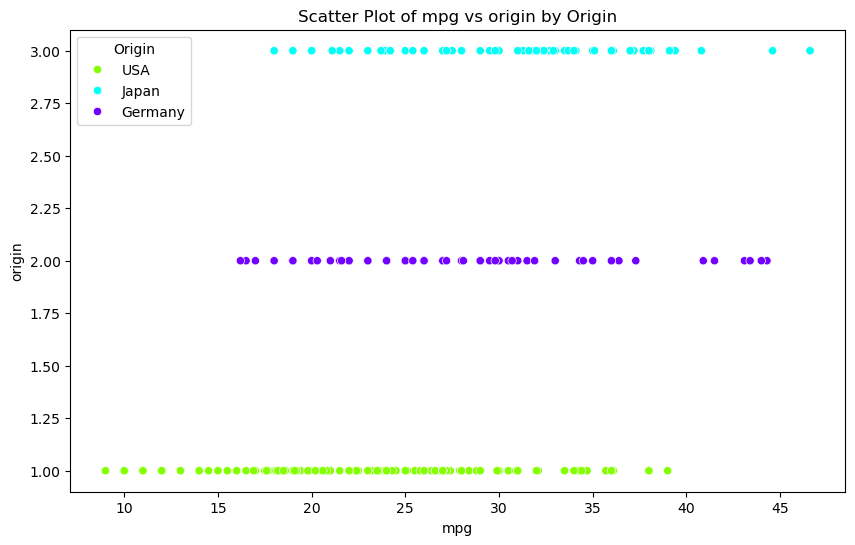

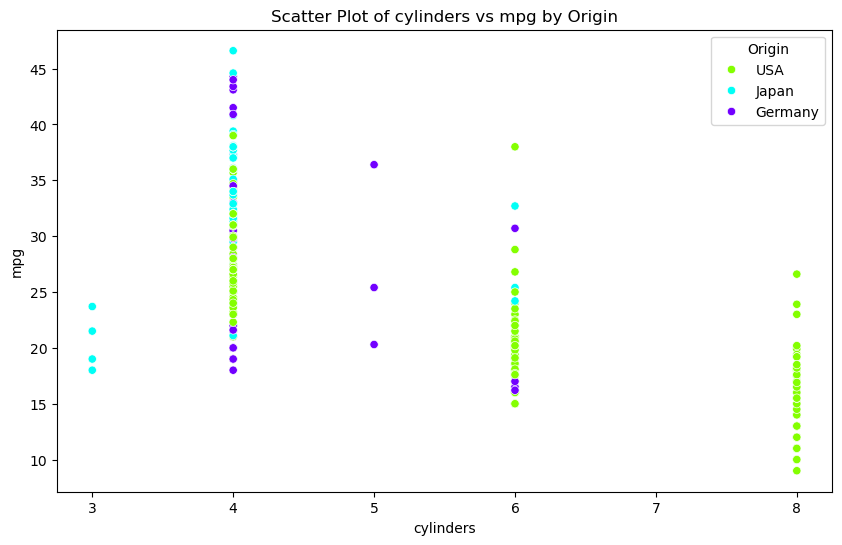

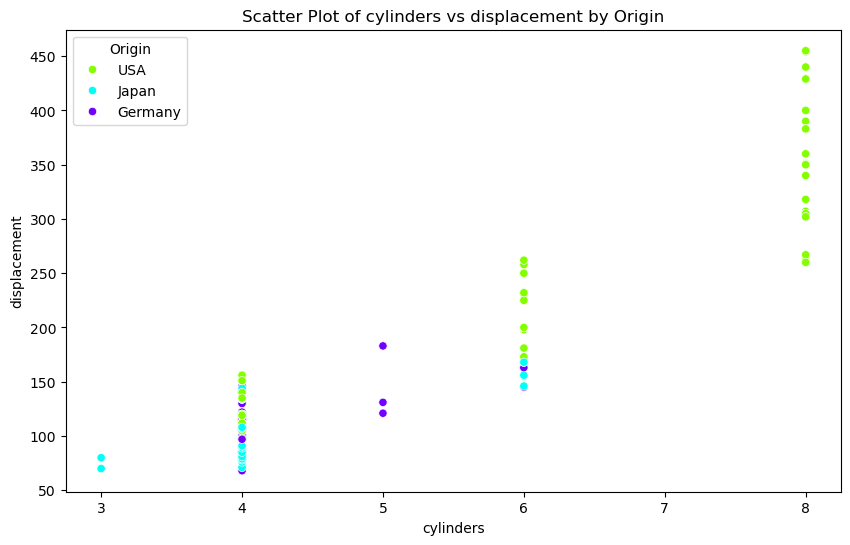

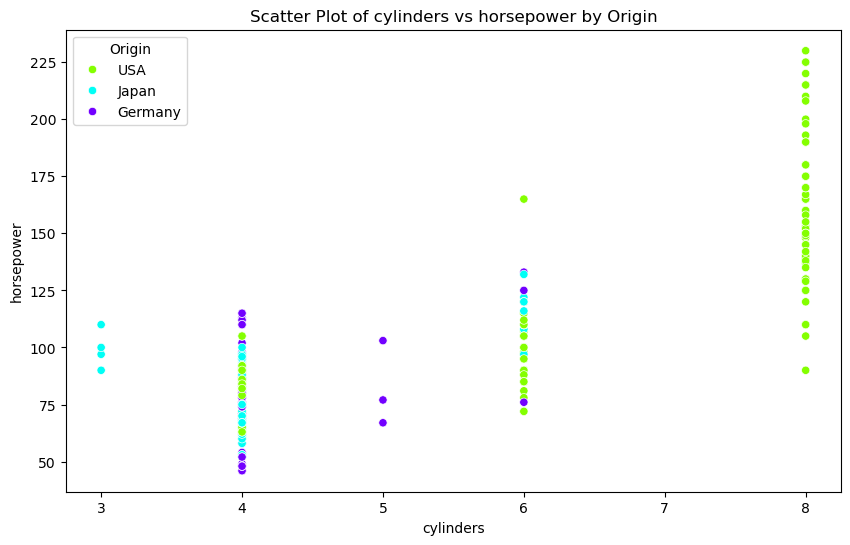

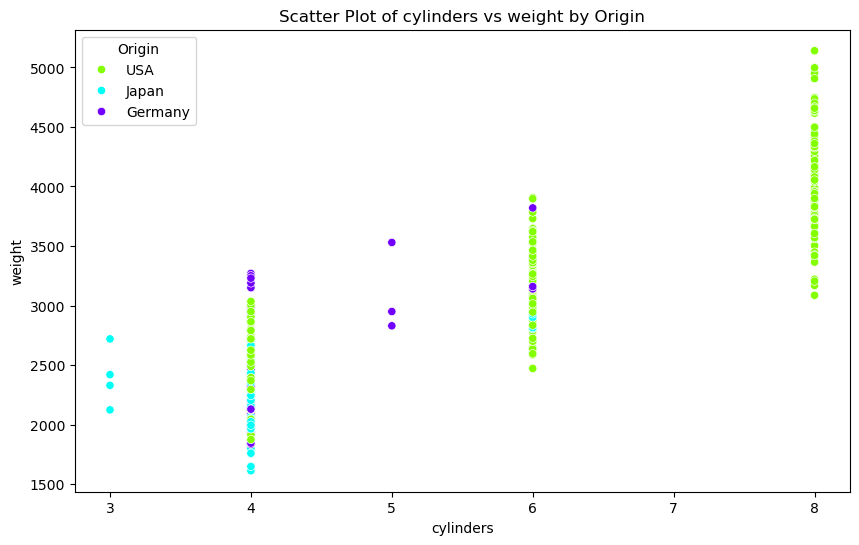

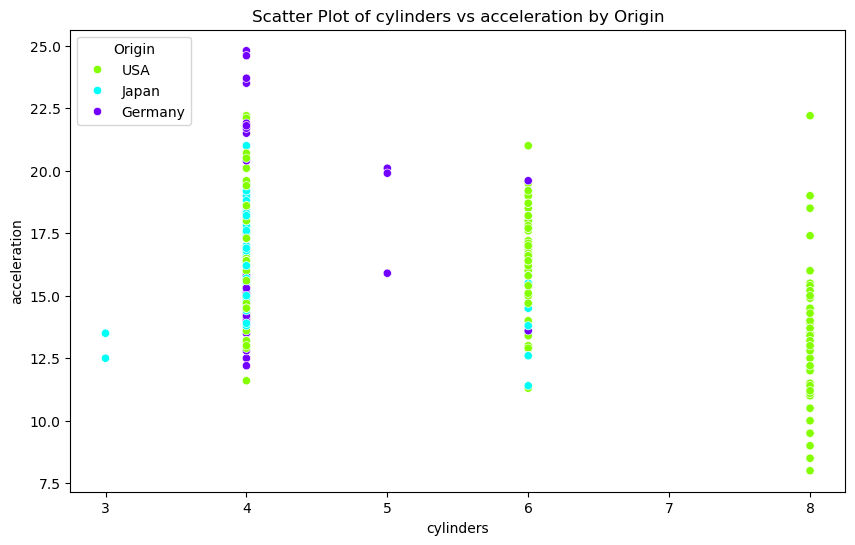

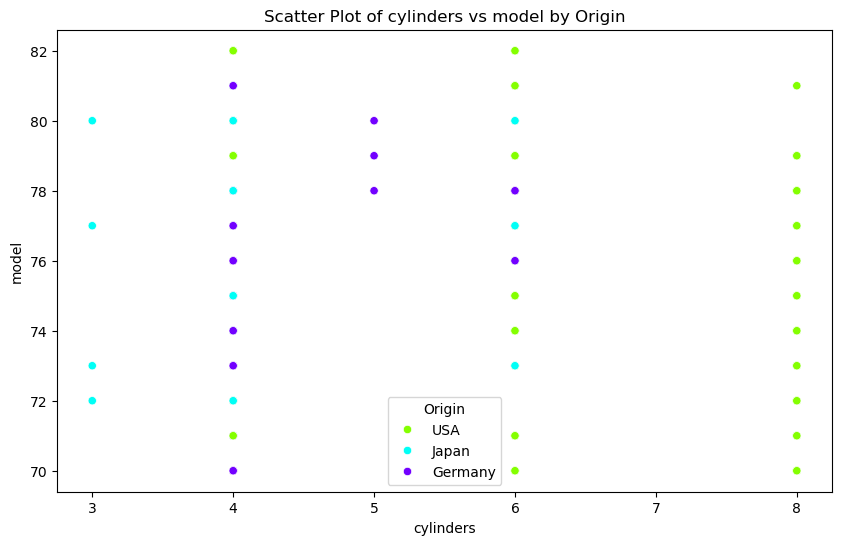

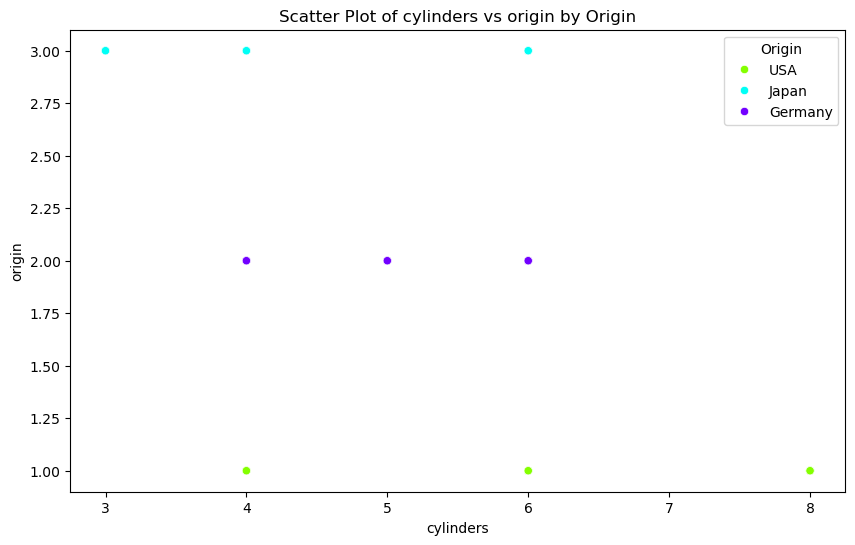

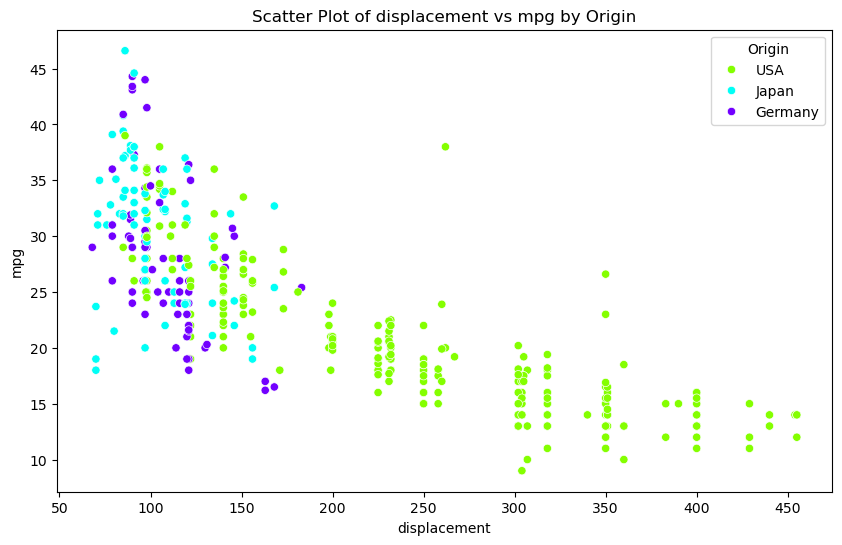

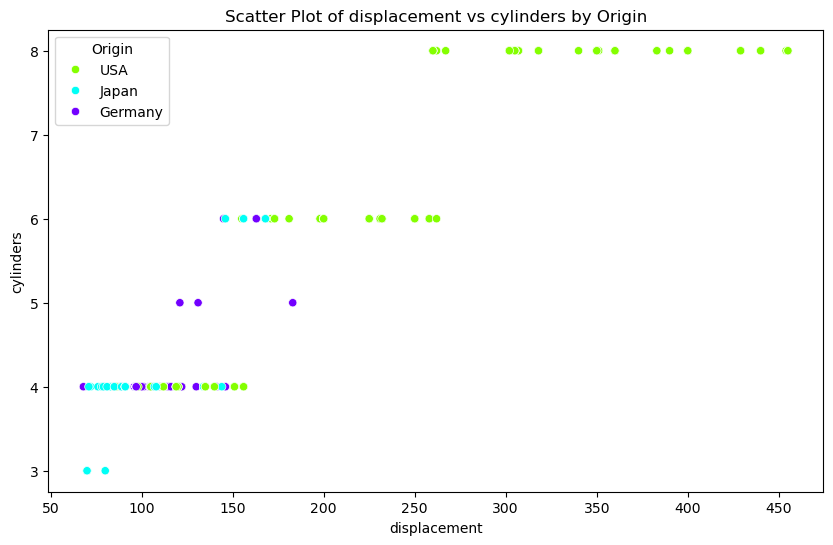

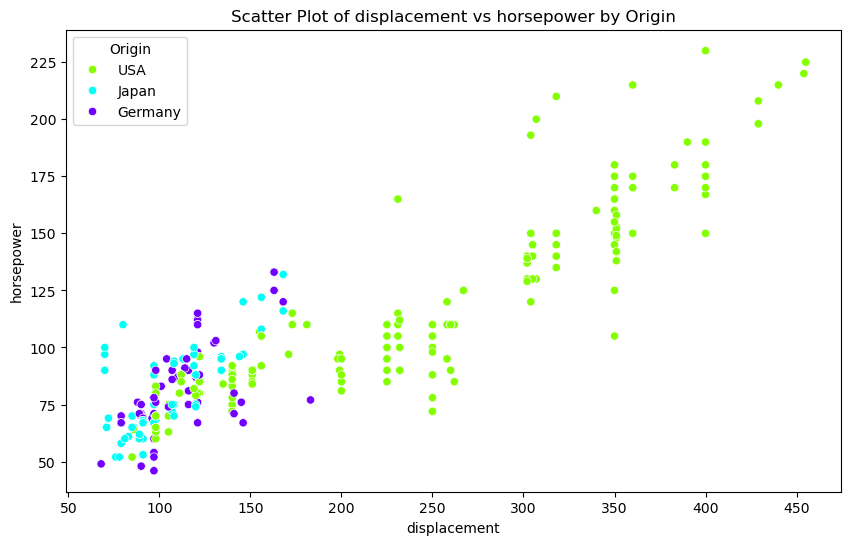

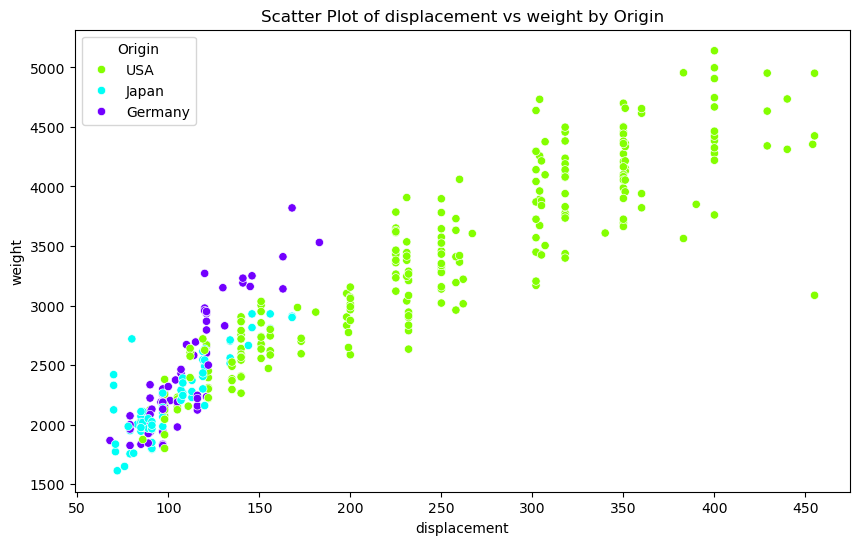

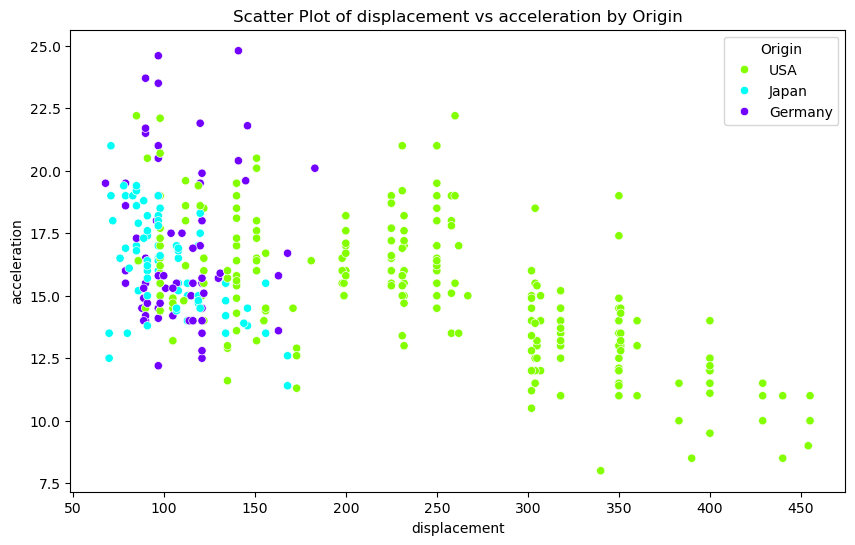

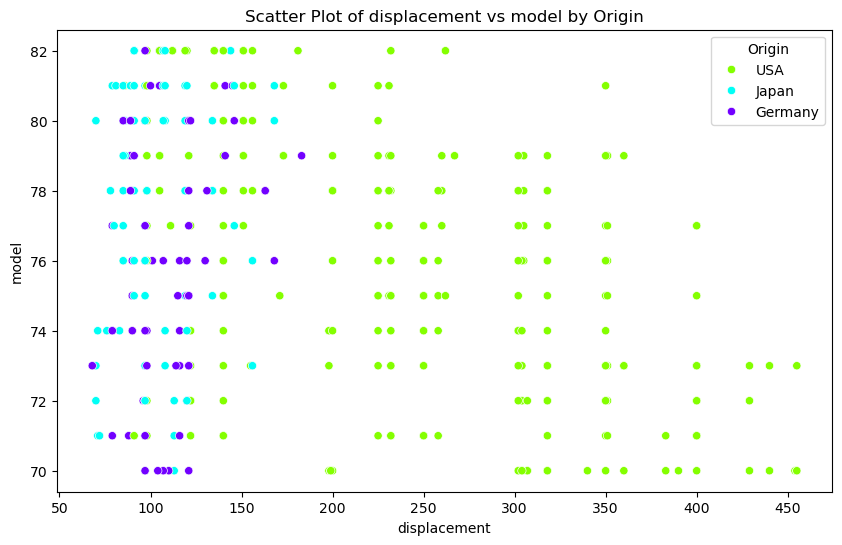

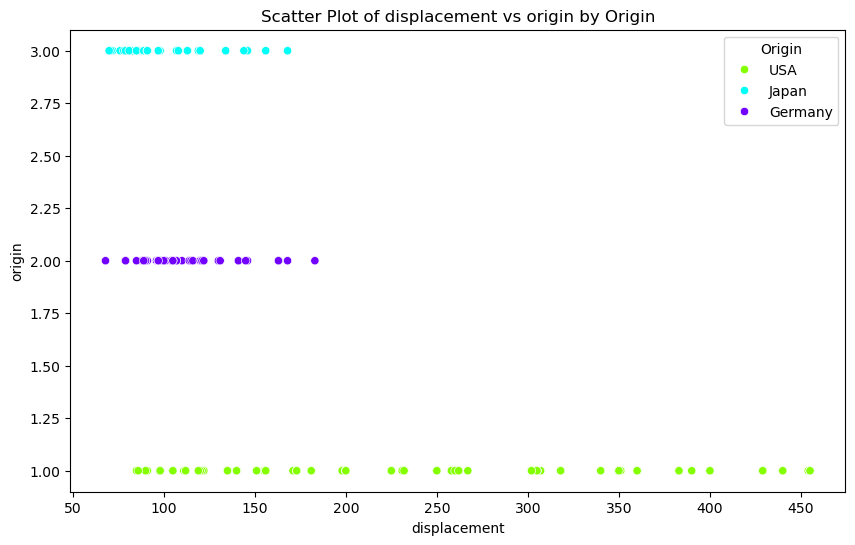

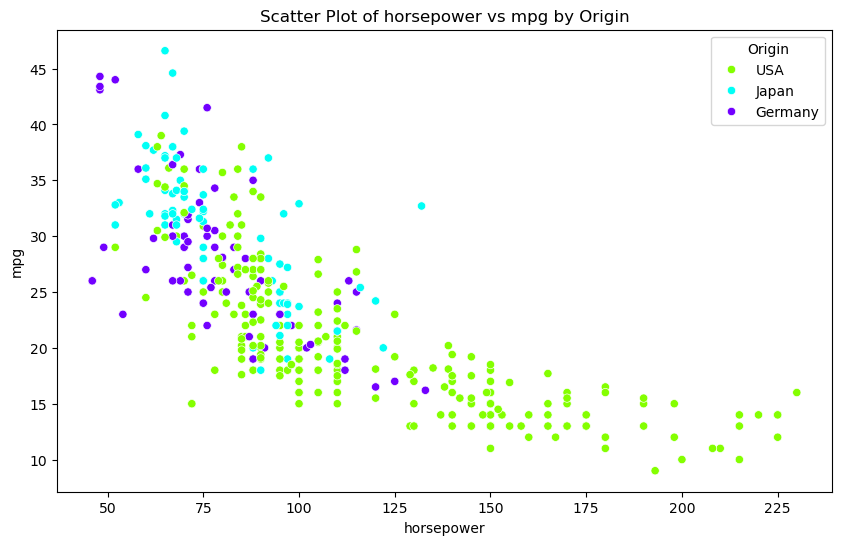

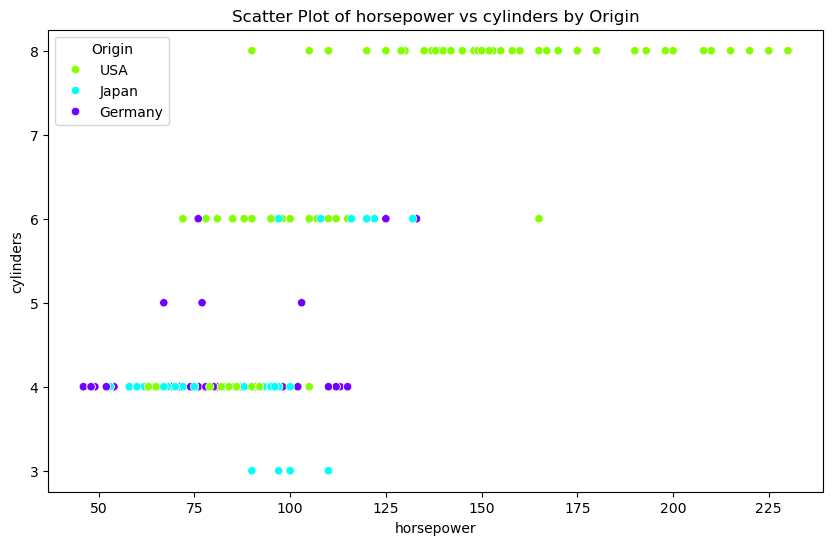

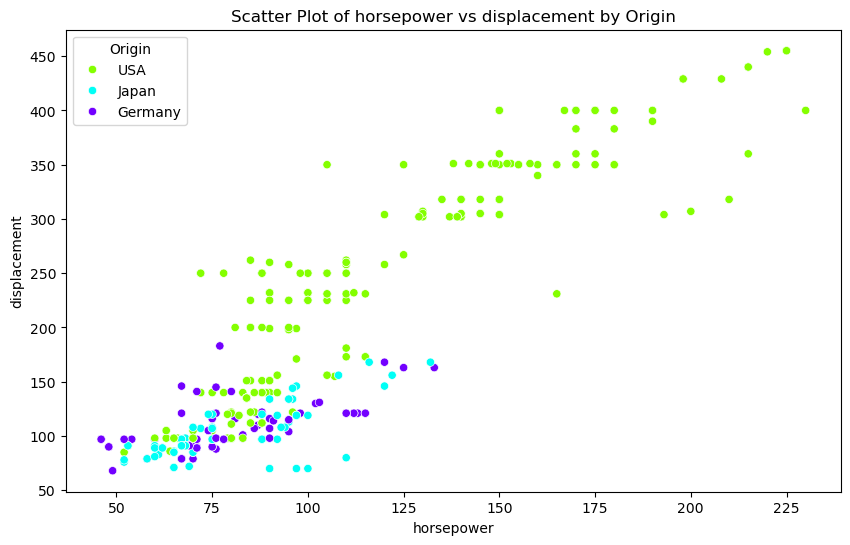

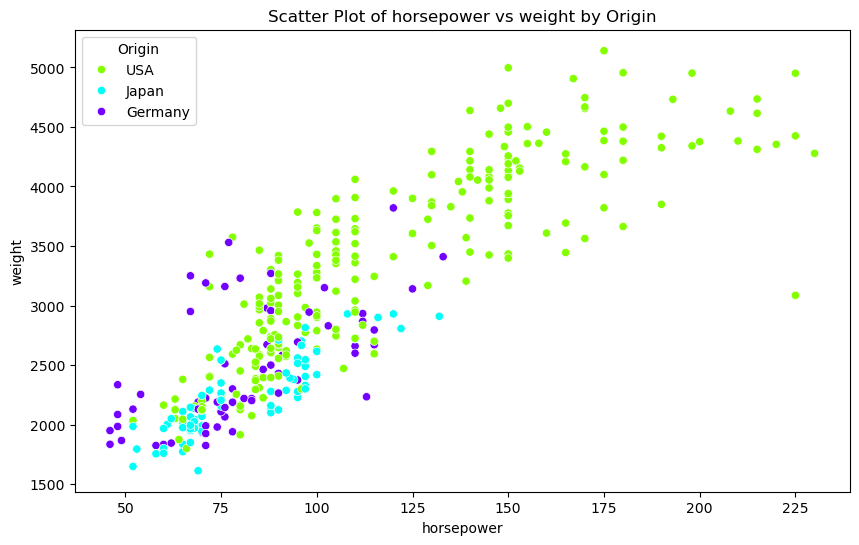

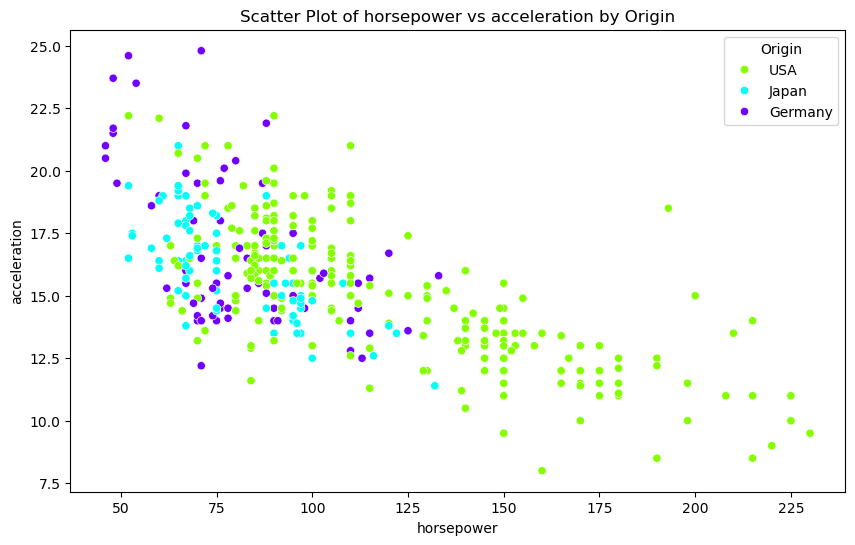

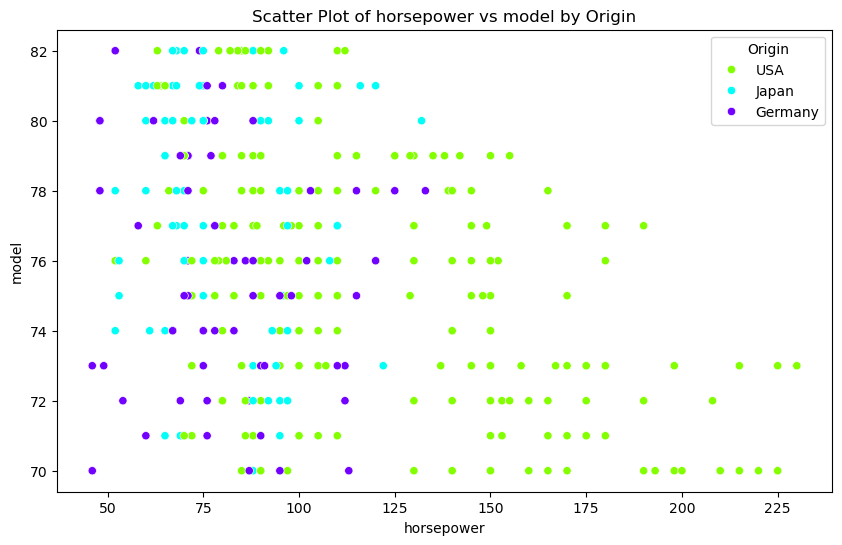

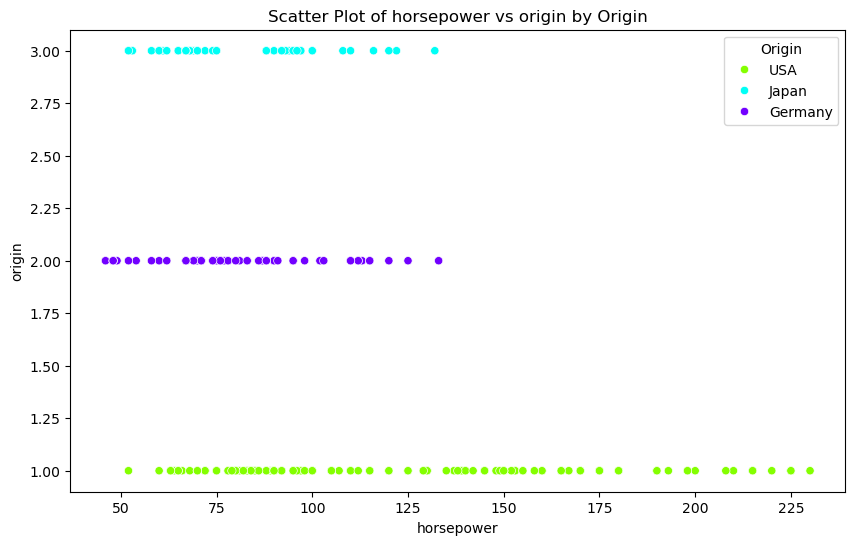

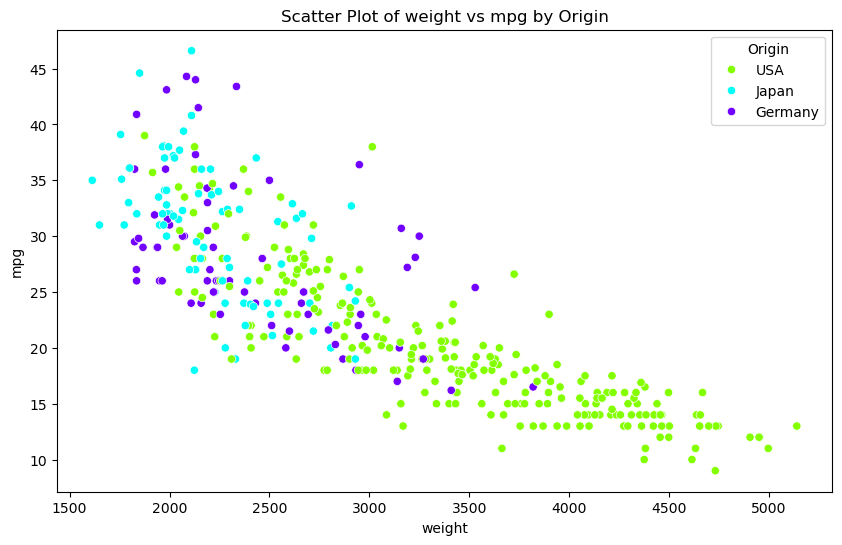

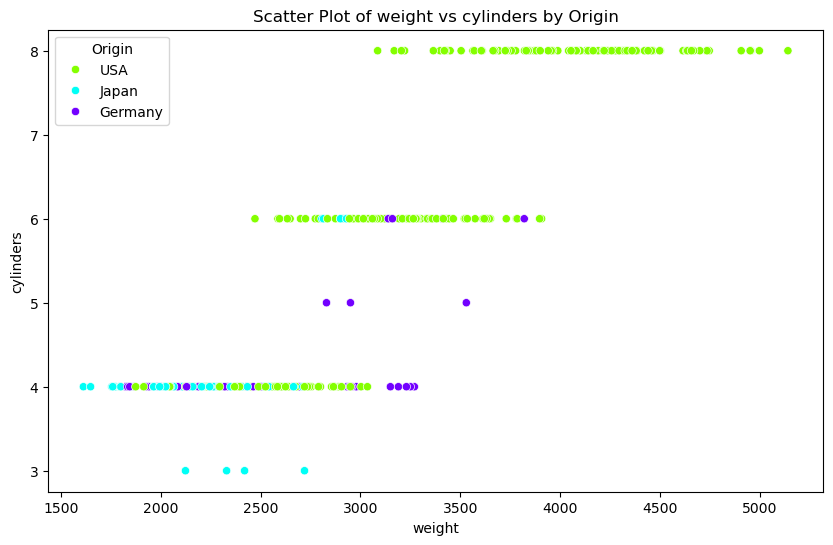

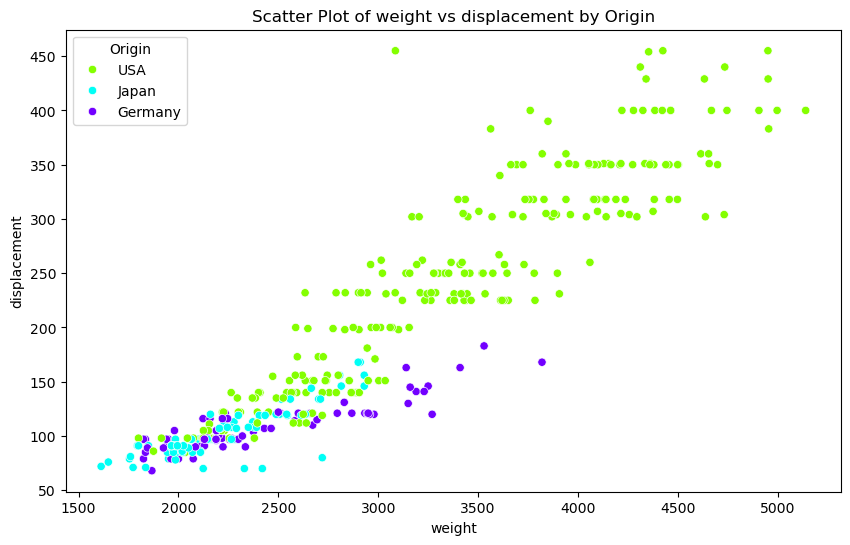

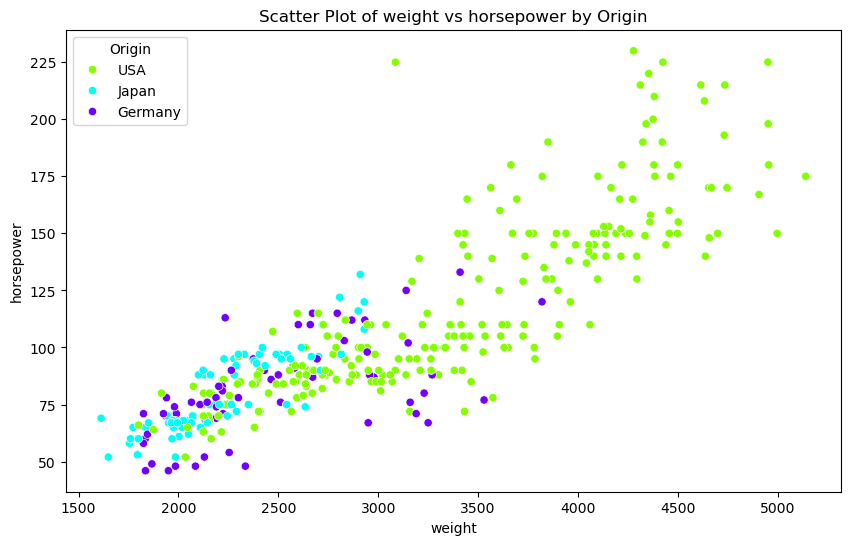

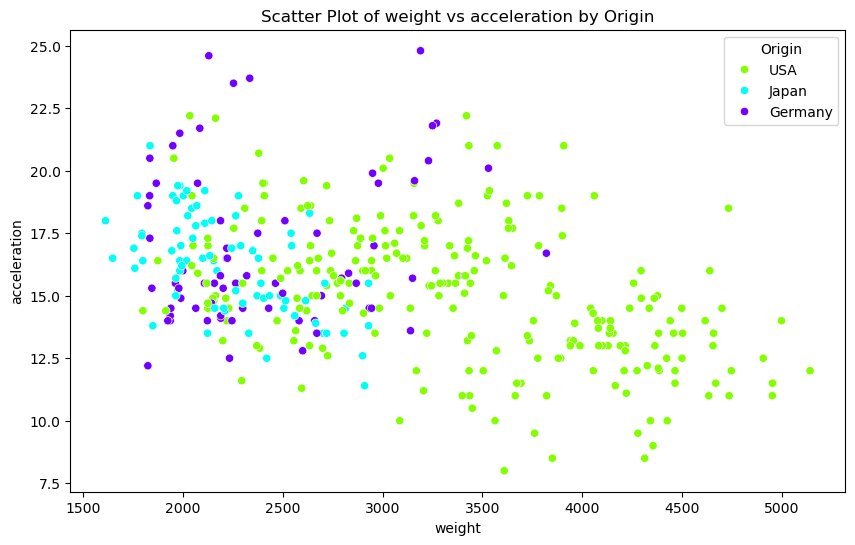

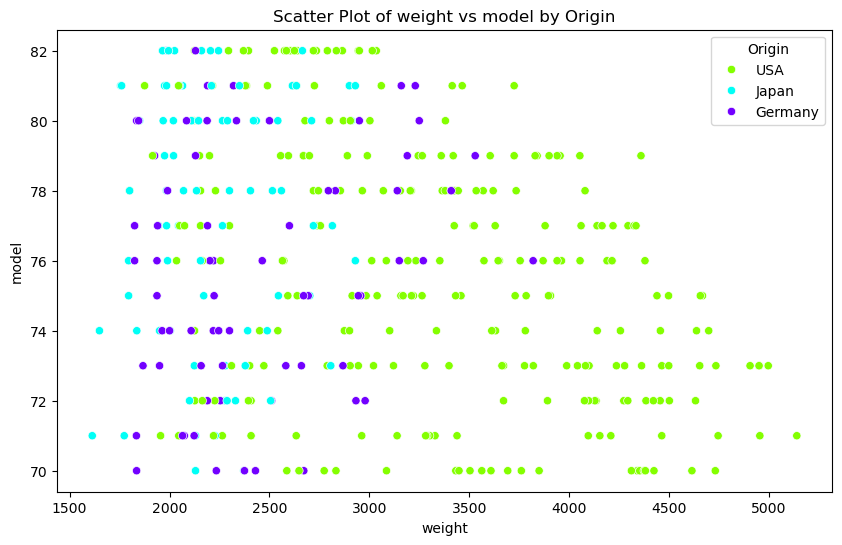

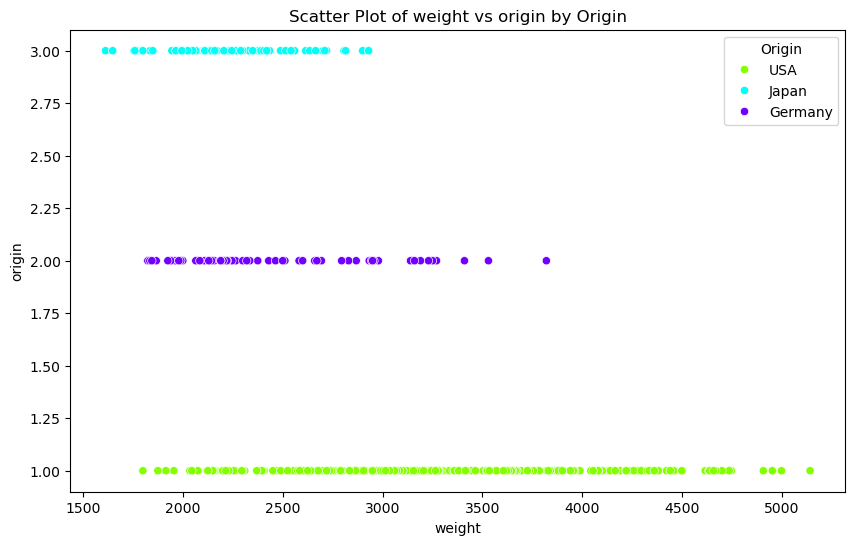

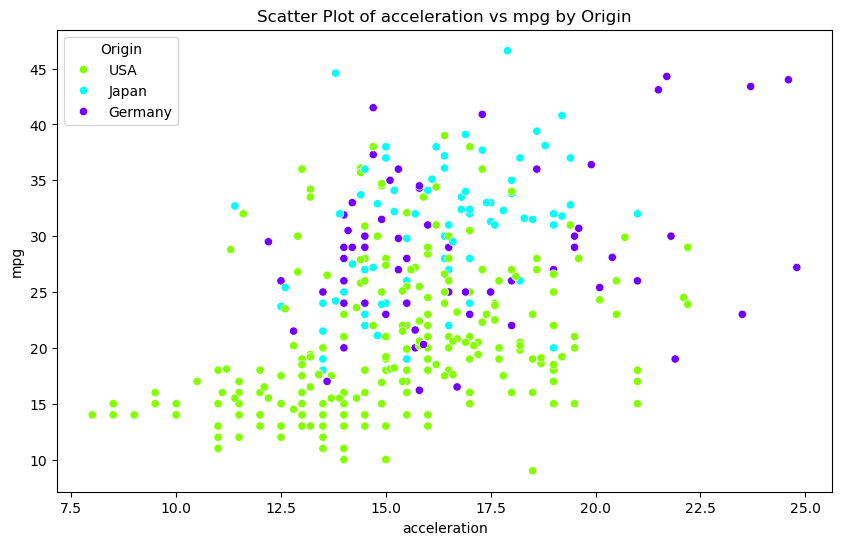

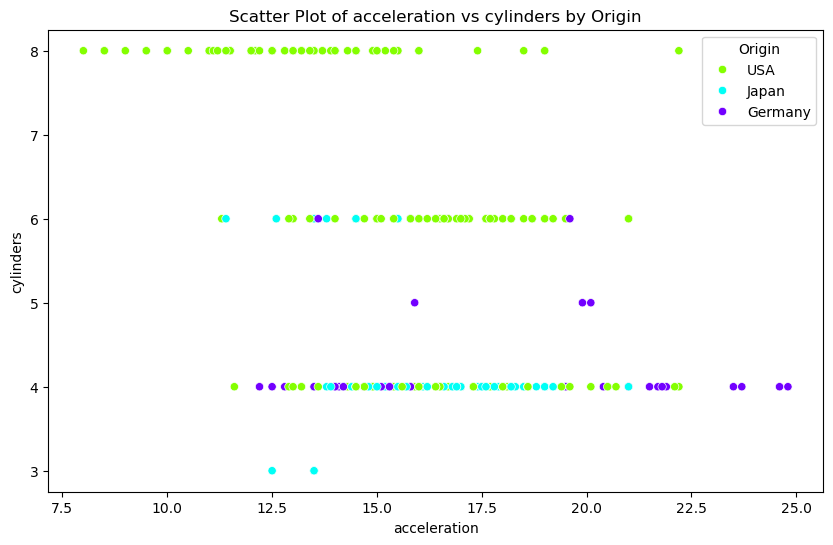

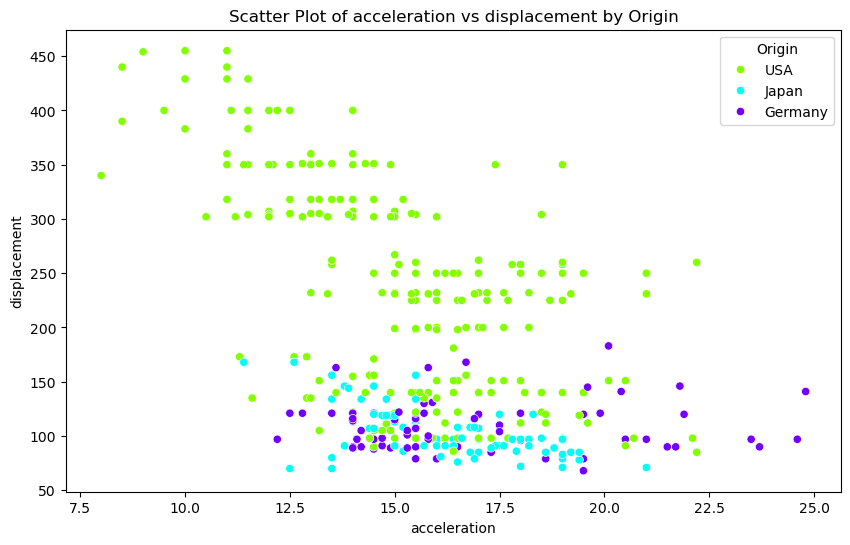

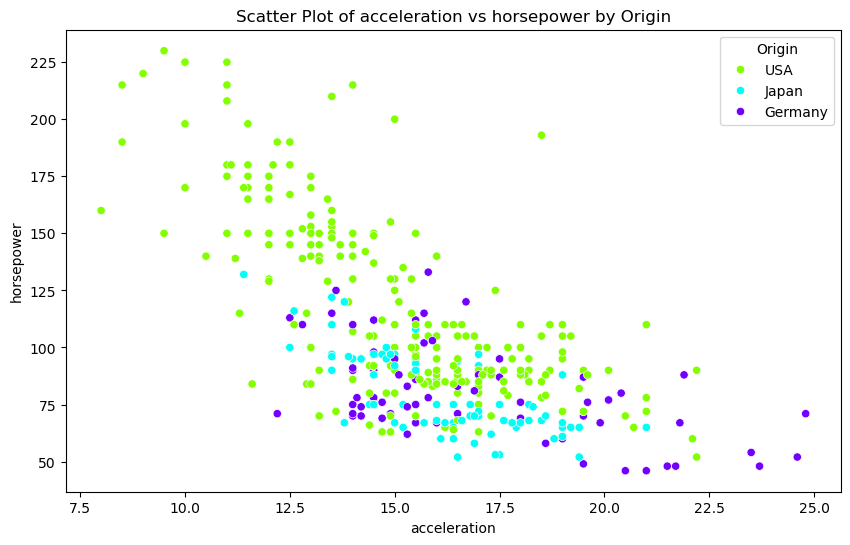

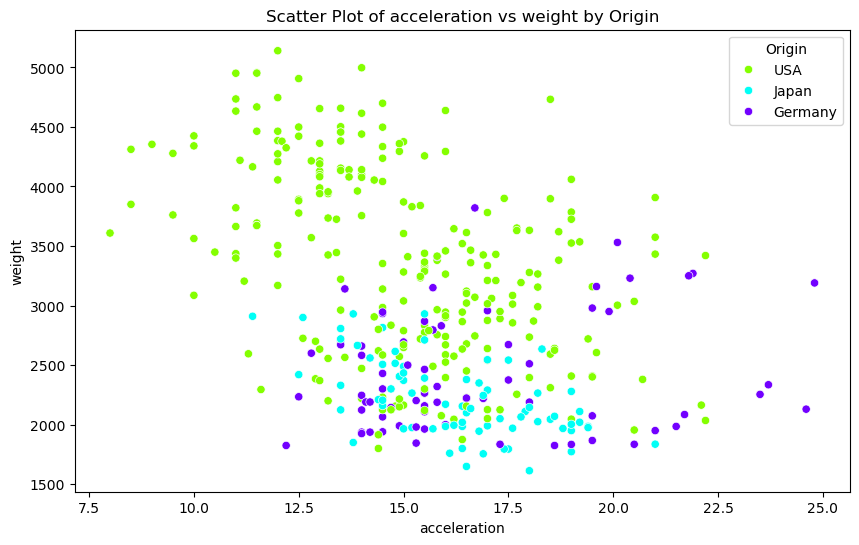

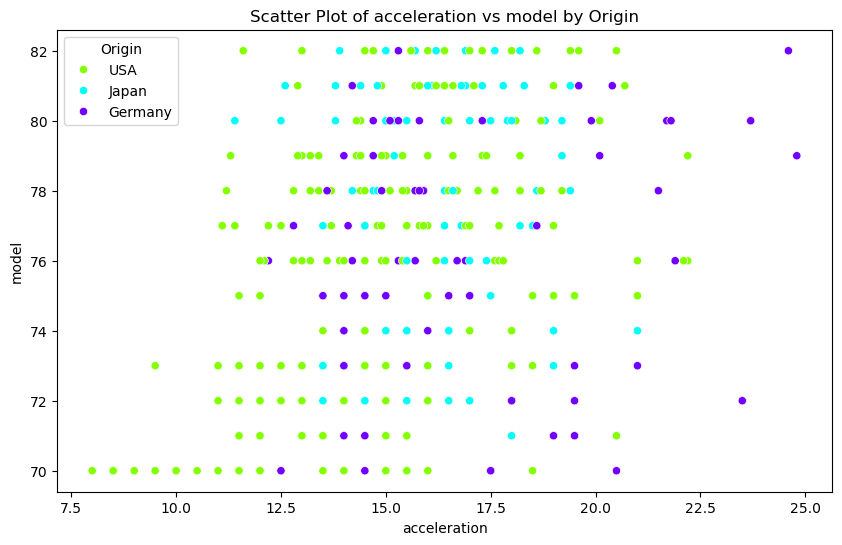

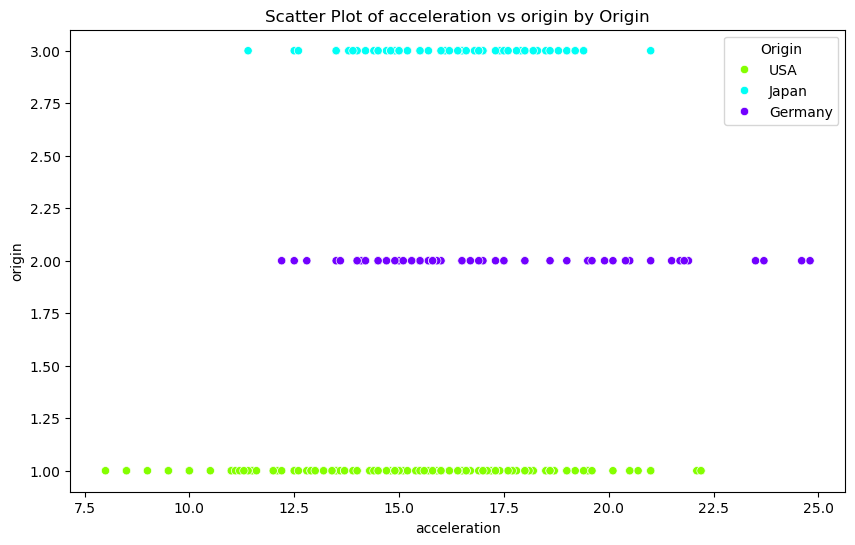

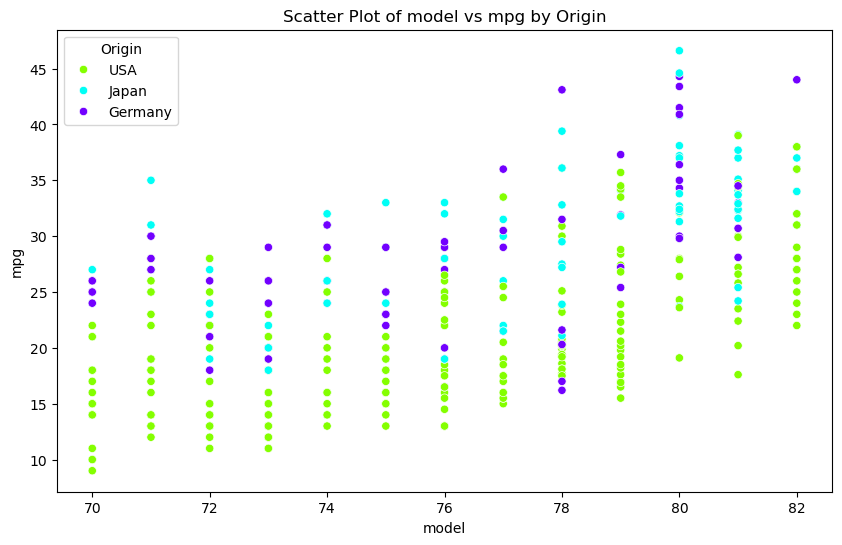

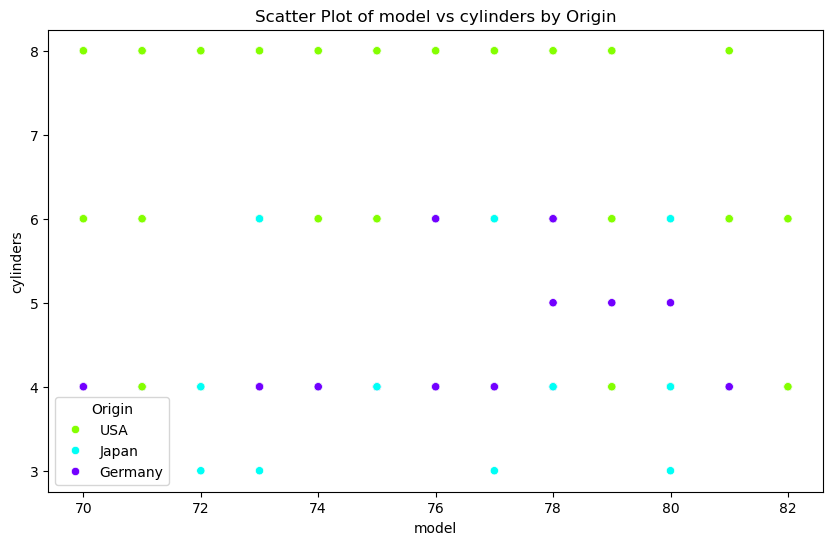

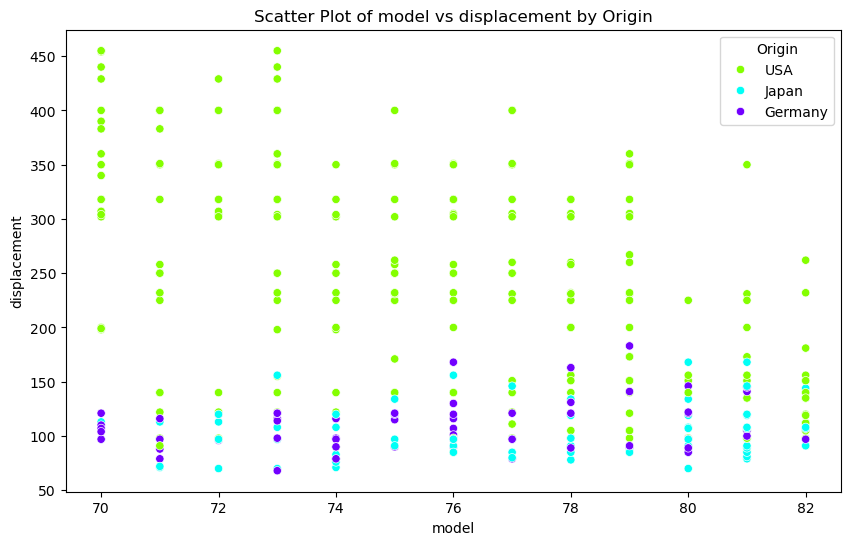

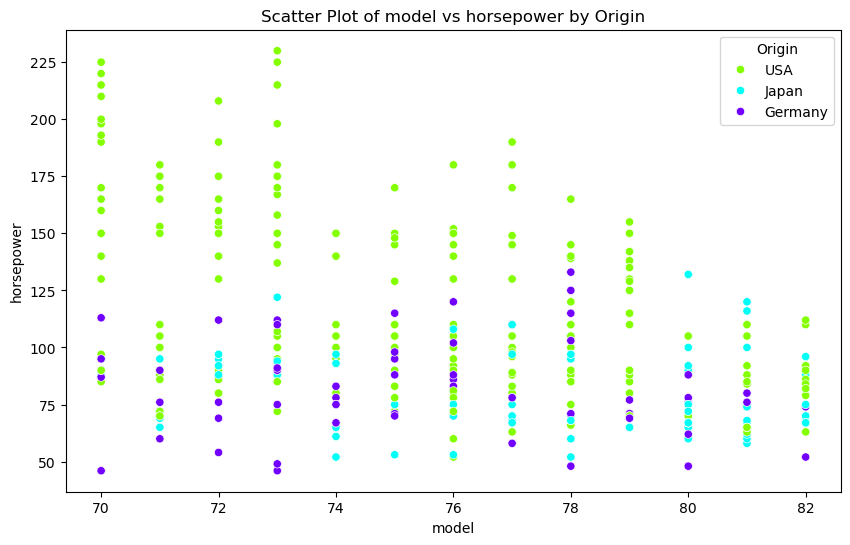

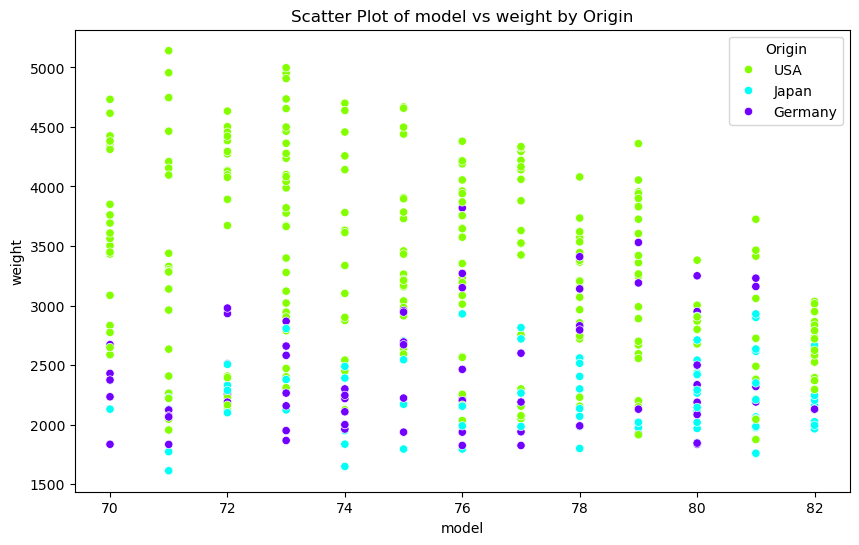

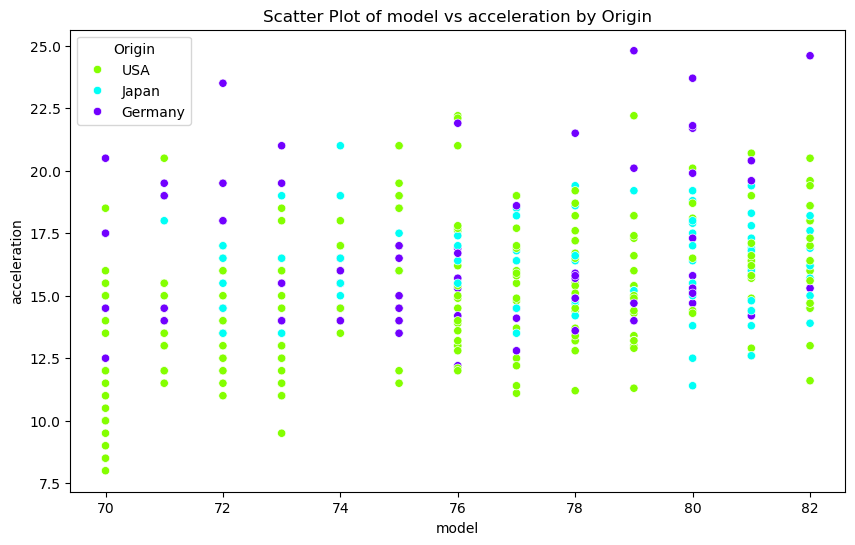

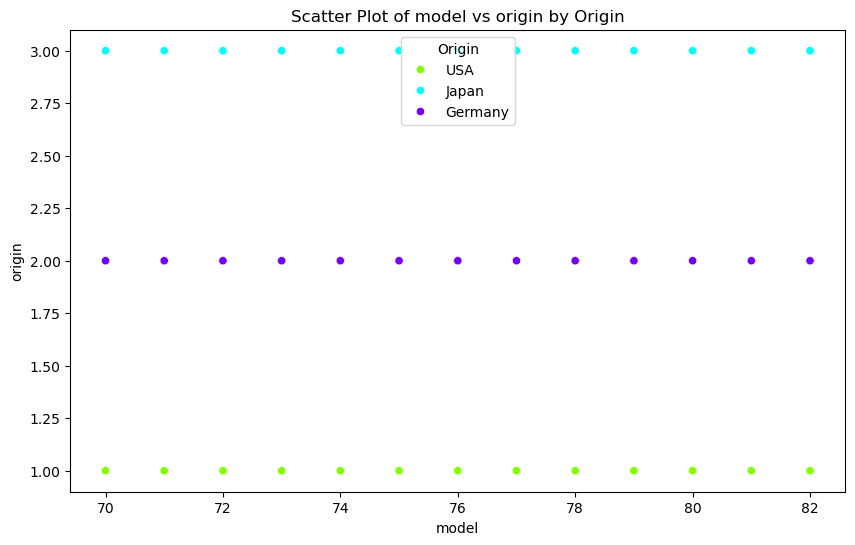

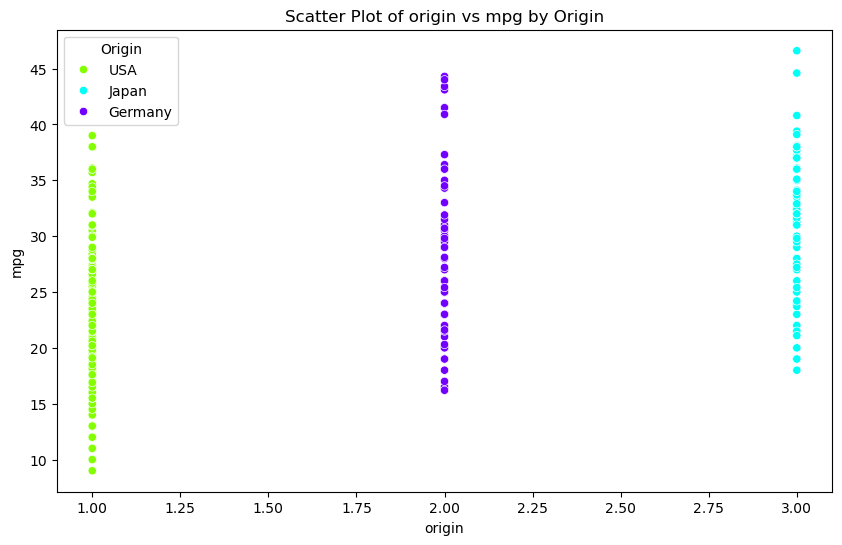

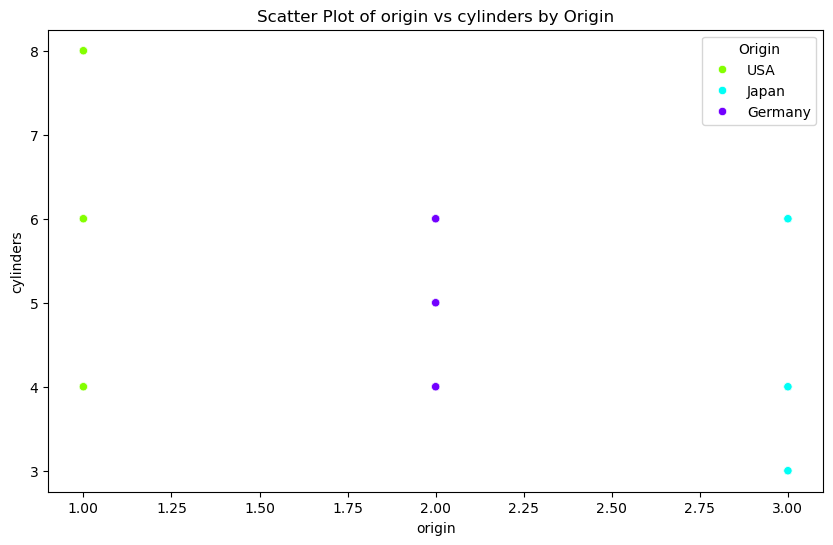

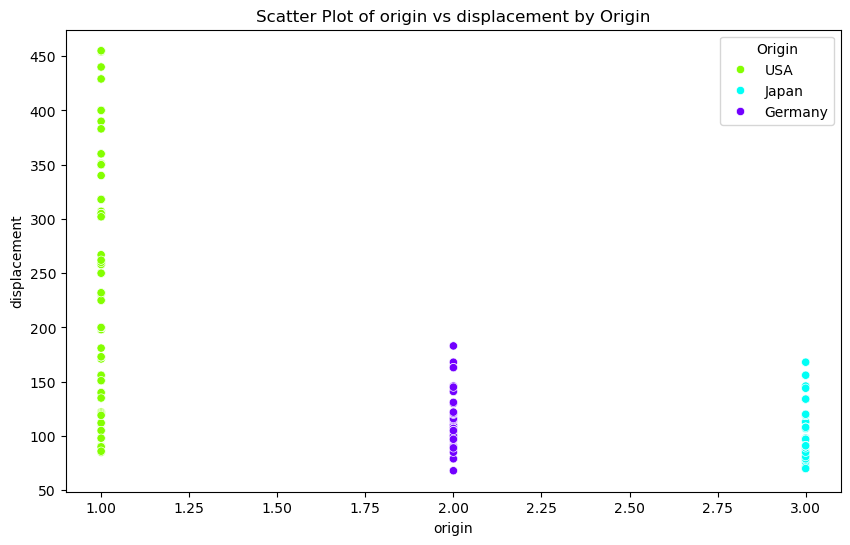

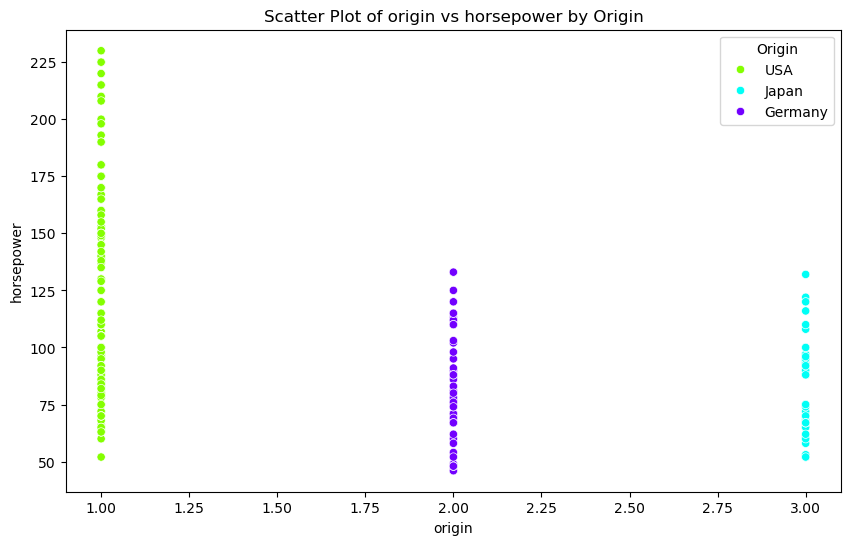

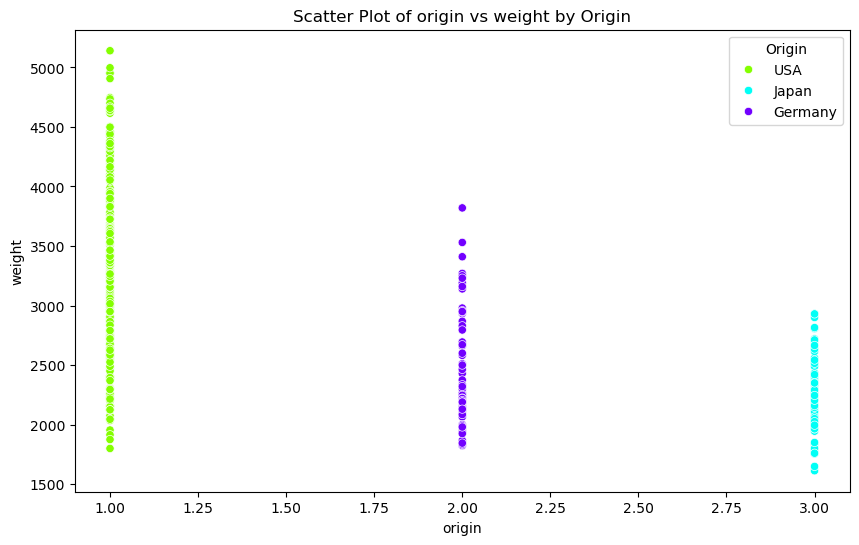

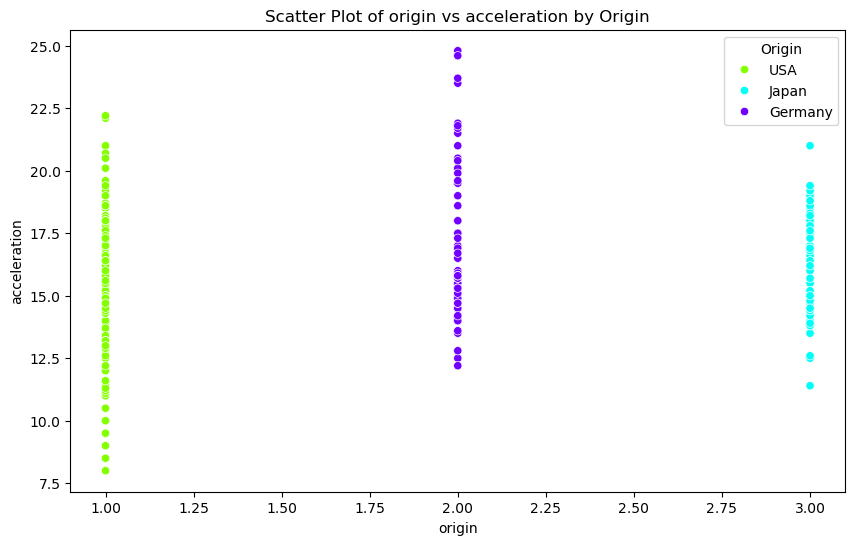

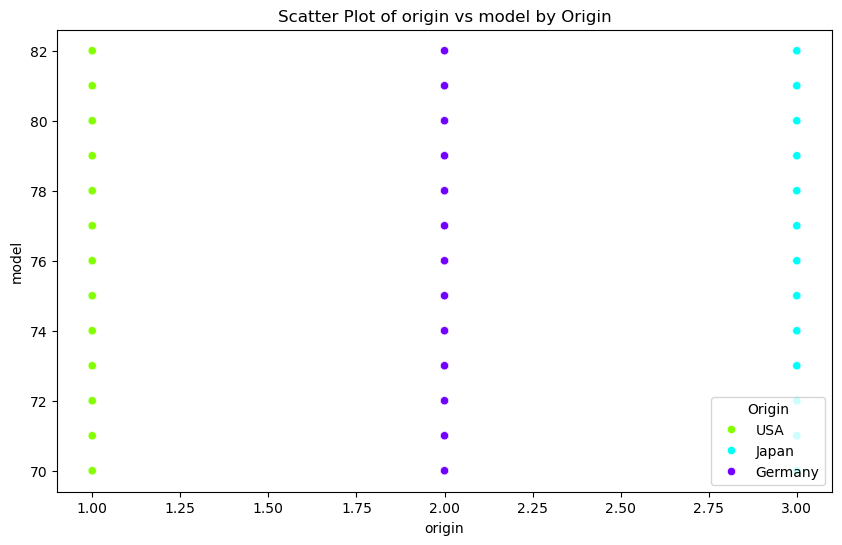

In [5]:
# Map numeric origins to country names
origin_names = {1: 'USA', 2: 'Germany', 3: 'Japan'}
df_cars['origin_name'] = df_cars['origin'].map(origin_names)

# Assuming 'origin' column contains integers 1, 2, 3
unique_origins = df_cars['origin_name'].unique()
print(unique_origins)

# Create a color palette with the same number of colors as there are unique origin names
palette = sns.color_palette("hsv", len(unique_origins))

# Create a dictionary to map origin name to color
color_map = dict(zip(unique_origins, palette))

# Filtering out non-numerical columns for simplicity
numerical_cols = df_cars.select_dtypes(include=['int64', 'float64']).columns

# Create scatter plots
for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 != col2:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(data=df_cars, x=col1, y=col2,
                            hue='origin_name', palette=color_map)  # Use the new 'origin_name' column
            plt.title(f'Scatter Plot of {col1} vs {col2} by Origin')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.legend(title='Origin')
            plt.show()

# Part 1
- **Question:** How do vehicles from different origins (USA, Germany, Japan) compare in terms of mpg, weight, and horsepower?

  - **Null Hypothesis $(H0)$:** There is no significant difference in mpg, weight, and horsepower among vehicles from different origins.
  - **Alternate Hypothesis $(H1)$:** There are significant differences in mpg, weight, and horsepower among vehicles from different origins.

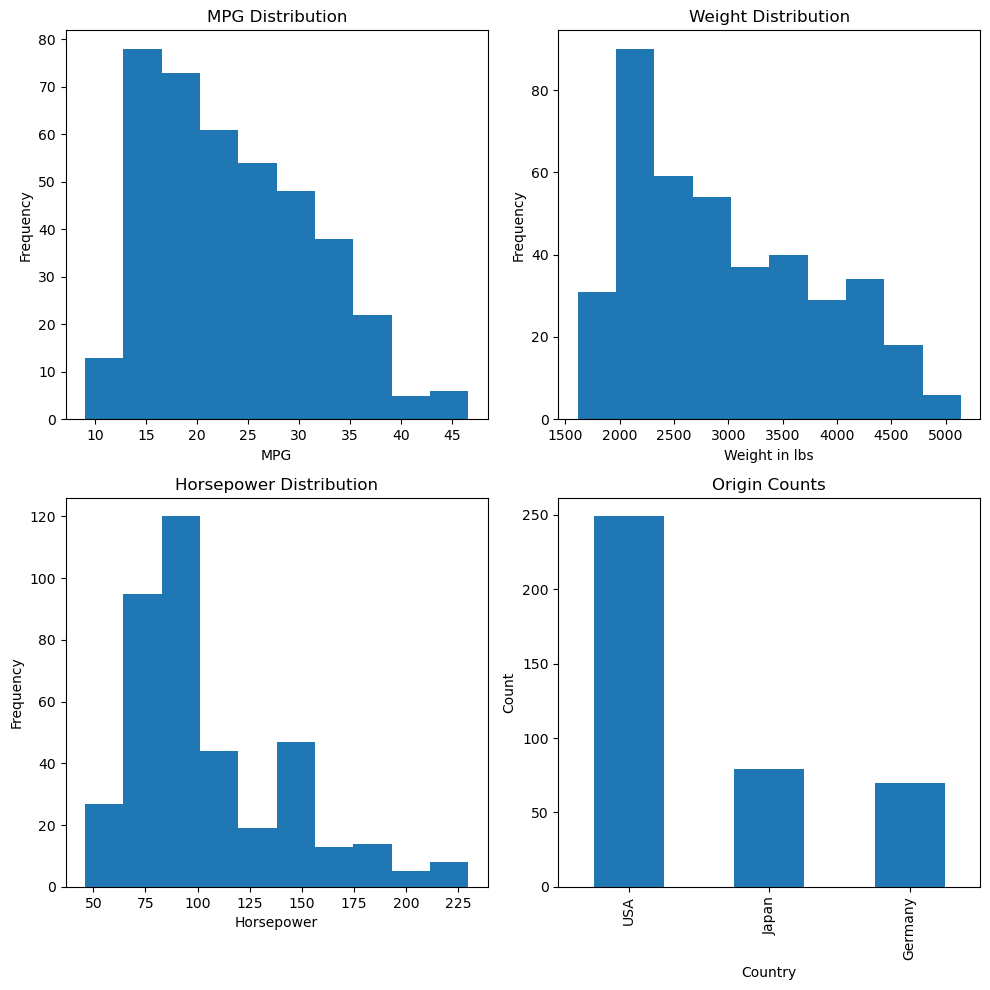

ANOVA for mpg: F_onewayResult(statistic=98.54179491075871, pvalue=1.9154864184128e-35)
ANOVA for weight: F_onewayResult(statistic=112.74350468918183, pvalue=1.8332404300161686e-39)
ANOVA for horsepower: F_onewayResult(statistic=61.342092972838266, pvalue=6.987300889212185e-24)


In [15]:
# Function to plot histograms
def plot_histogram(data, column, title, xlabel, ylabel='Frequency', bins=None):
    data[column].plot(kind='hist', bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Create subplots for the histograms
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
df_cars['mpg'].plot(kind='hist', ax=axs[0, 0], title='MPG Distribution')
axs[0, 0].set_xlabel('MPG')
axs[0, 0].set_ylabel('Frequency')

df_cars['weight'].plot(kind='hist', ax=axs[0, 1], title='Weight Distribution')
axs[0, 1].set_xlabel('Weight in lbs')
axs[0, 1].set_ylabel('Frequency')

df_cars['horsepower'].plot(kind='hist', ax=axs[1, 0], title='Horsepower Distribution')
axs[1, 0].set_xlabel('Horsepower')
axs[1, 0].set_ylabel('Frequency')

# Plotting origin counts in the last subplot
df_cars['origin_name'].value_counts().plot(kind='bar', ax=axs[1, 1], title='Origin Counts')
axs[1, 1].set_xlabel('Country')
axs[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Ensure 'mpg', 'weight', and 'horsepower' are numeric
df_cars['mpg'] = pd.to_numeric(df_cars['mpg'], errors='coerce')
df_cars['weight'] = pd.to_numeric(df_cars['weight'], errors='coerce')
df_cars['horsepower'] = pd.to_numeric(df_cars['horsepower'], errors='coerce')

# Filter data by origin using the mapped names
usa = df_cars[df_cars['origin_name'] == 'USA']
germany = df_cars[df_cars['origin_name'] == 'Germany']
japan = df_cars[df_cars['origin_name'] == 'Japan']

# Perform ANOVA for each variable
anova_mpg = scipy.stats.f_oneway(usa['mpg'].dropna(), germany['mpg'].dropna(), japan['mpg'].dropna())
anova_weight = scipy.stats.f_oneway(usa['weight'].dropna(), germany['weight'].dropna(), japan['weight'].dropna())
anova_horsepower = scipy.stats.f_oneway(usa['horsepower'].dropna(), germany['horsepower'].dropna(), japan['horsepower'].dropna())

# Print ANOVA results
print(f"ANOVA for mpg: {anova_mpg}")
print(f"ANOVA for weight: {anova_weight}")
print(f"ANOVA for horsepower: {anova_horsepower}")

**MPG:** There is a statistically significant difference in the MPG among vehicles from different origins. 

>> Reject the `null hypothesis`.

**Weight:** There is a statistically significant difference in the weight of vehicles from different origins. 

>> Reject the `null hypothesis` for weight.

**Horsepower:** There is a statistically significant difference in horsepower among vehicles from different origins. 

>>Reject the `null hypothesis`.

# Part 2

- **Question:** Are vehicles from Japan generally more fuel-efficient compared to those from the USA?

  - **Null Hypothesis $(H0)$:** Vehicles from Japan are not significantly more fuel-efficient compared to those from the USA.
  - **Alternate Hypothesis $(H1)$:** Vehicles from Japan are significantly more fuel-efficient compared to those from the USA.

U-statistic: 17171.5
P-value: 8.171225467272223e-24
Reject the null hypothesis - Vehicles from Japan are significantly more fuel-efficient compared to those from the USA.


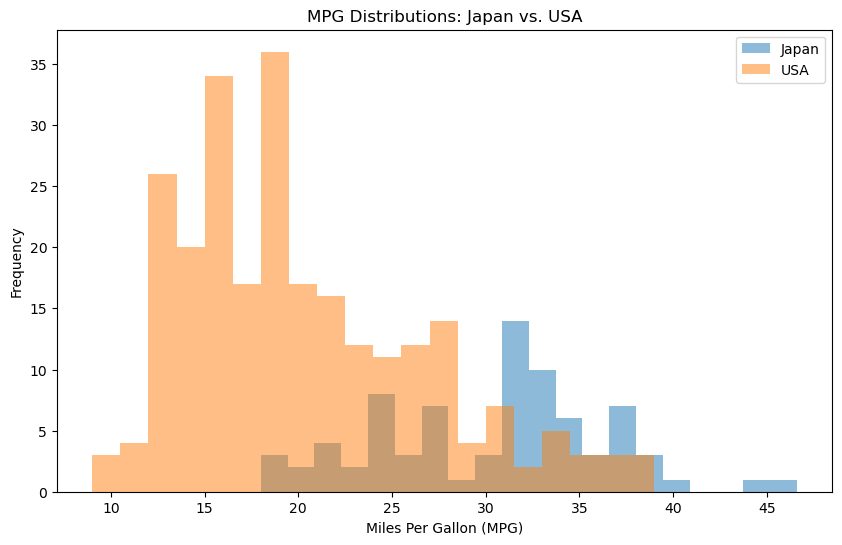

In [18]:
# Filter the data for vehicles from Japan and the USA
japan_mpg = df_cars[df_cars['origin_name'] == 'Japan']['mpg']
usa_mpg = df_cars[df_cars['origin_name'] == 'USA']['mpg']

# Perform the Mann-Whitney U test
u_stat, p_value = scipy.stats.mannwhitneyu(japan_mpg, usa_mpg, alternative='greater')

print(f"U-statistic: {u_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis - Vehicles from Japan are significantly more fuel-efficient compared to those from the USA.")
else:
    print("Fail to reject the null hypothesis - Vehicles from Japan are not significantly more fuel-efficient compared to those from the USA.")

# Plotting the distributions
plt.figure(figsize=(10, 6))
plt.hist(japan_mpg, alpha=0.5, label='Japan', bins=20)
plt.hist(usa_mpg, alpha=0.5, label='USA', bins=20)
plt.title('MPG Distributions: Japan vs. USA')
plt.xlabel('Miles Per Gallon (MPG)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

**Inference:** Reject the null hypothesis - Vehicles from Japan are significantly more fuel-efficient compared to those from the USA.